# Quickstart: Building a GenAI powered Semantic Data Model with Intugle

This quickstart shows you how to use Intugle’s open-source library to transform fragmented datasets into a connected semantic model. The semantic model captures profiling, relationships, and business meaning of your data — making it instantly usable for exploration, search, and data product creation.

**What is a Semantic Model?**

A semantic model is an intelligent knowledge graph of your data. It connects tables, discovers relationships, and enriches them with business glossaries — so both data teams and business users can query with clarity, not complexity.

**Who is this for?**

*   **Data Engineers & Architects** often spend weeks manually profiling, classifying, and stitching together fragmented data assets. With Intugle, they can automate this process end-to-end, uncovering meaningful links and relationships to instantly generate a connected semantic layer.
*   **Data Analysts & Scientists** spend endless hours on data readiness and preparation before they can even start the real analysis. Intugle accelerates this by providing contextual intelligence, automatically generating SQL and reusable data products enriched with relationships and business meaning.
*   **Business Analysts & Decision Makers** are slowed down by constant dependence on technical teams for answers. Intugle removes this bottleneck by enabling natural language queries and semantic search, giving them trusted insights on demand.

**In this notebook, you will learn how to:**

*   **Generate Semantic Model** → The unified layer that transforms fragmented datasets, creating the foundation for connected intelligence.
    *   **1.1 Profile and classify data** → Analyze your data sources to understand their structure, data types, and other characteristics.
    *   **1.2 Discover links & relationships among data** → Reveal meaningful connections (PK & FK) across fragmented tables.
    *   **1.3 Generate a business glossary** → Create business-friendly terms and use them to query data with context.
    *   **1.4 Enable Semantic search** → Intelligent search that understands meaning, not just keywords—making data more accessible across both technical and business users.
    *   **1.5 Visualize semantic model** → Get access to enriched metadata of the semantic model and visualize your data and relationships.
*   **Build Unified Data Products** → Simply pick the attributes across your data tables, and let the toolkit auto-generate queries with all the required joins, transformations, and aggregations using the semantic layer. When executed, these queries produce reusable data products.

Before you start, make sure you install the **Intugle Data Tools**:

In [0]:
%pip install intugle

This project also has a dependency on sqlglot. Make sure you install sqlglot as well:

In [0]:
%pip install sqlglot

## 1. LLM Configuration

Before running the project, you need to configure a Large Language Model (LLM). This is used for tasks like generating business glossaries and predicting links between tables. For detailed setup instructions, please refer to the [README.md](https://github.com/Intugle/data-tools/blob/main/README.md) file.

You can configure the necessary services by setting the following environment variables:

*   `LLM_PROVIDER`: The LLM provider and model to use (e.g., `openai:gpt-3.5-turbo`). The format follows langchain's format for initializing chat models. Checkout how to specify your model [here](https://python.langchain.com/docs/integrations/chat/)
*   `API_KEY`: Your API key for the LLM provider. The exact name of the variable may vary from provider to provider (e.g., `OPENAI_API_KEY`, `ANTHROPIC_API_KEY`).

Here's an example of how to set these variables in your environment:

```bash
export LLM_PROVIDER="openai:gpt-3.5-turbo"
export OPENAI_API_KEY="your-openai-api-key"
```
Alternatively, you can set them in the notebook like this:

In [0]:
import os

os.environ["LLM_PROVIDER"] = "openai:gpt-3.5-turbo"
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"  # Replace with your actual key


> Currently the langchain packages for OpenAI, Anthropic and Gemini is installed by default. For additional models, make sure you have the integration packages installed. E.g. you should have langchain-deepseek installed to use a DeepSeek model. You can get these packages here: [LangChain Chat Models](https://python.langchain.com/docs/integrations/chat/)

## 2. Building the Semantic Model

The `SemanticModel` is the entry point for building your semantic layer. It takes a dictionary of datasets as input and performs the following steps:

1.  **Data Profiling:** Calculates statistics for each column, such as distinct count, uniqueness, and completeness.
2.  **Datatype Identification:** Identifies the data type of each column (e.g., integer, string, datetime).
3.  **Key Identification:** Identifies potential primary keys.
4.  **Glossary Generation:** Generates a business glossary for each column using an LLM.
5.  **Link Prediction:** Predicts the relationships (foreign keys) between tables.

Let's start by defining the datasets we want to use. The path shown below can be a local file path or a remote URL.

In [0]:
def generate_config(table_name: str) -> str:
    """Append the base URL to the table name."""
    return {
        "path": f"/Volumes/intugle/default/sample_datasets/{table_name}.csv",   # replace with your path volume path in databricks
        "type": "csv",
    }


table_names = [
    "allergies",
    "careplans",
    "claims",
    "claims_transactions",
    "devices",
    "encounters",
    "medications",
    "patients",
]

datasets = {table: generate_config(table) for table in table_names}

Now, let's use the `SemanticModel` to build our semantic layer:

> The `domain` parameter helps the LLM generate a more contextual business glossary. It specifies the industry domain that the dataset belongs to (e.g., "Healthcare", "Finance", "E-commerce").

In [0]:
from intugle import SemanticModel

# Initialize the semantic model
sm = SemanticModel(datasets, domain="Healthcare")

# Run the prediction
sm.build()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9a0df46e80>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
[n

Found existing YAML for 'allergies'. Checking for staleness.
allergies loaded
Found existing YAML for 'careplans'. Checking for staleness.
careplans loaded
Found existing YAML for 'claims'. Checking for staleness.
claims loaded
Found existing YAML for 'claims_transactions'. Checking for staleness.
claims_transactions loaded
Found existing YAML for 'devices'. Checking for staleness.
devices loaded
Found existing YAML for 'encounters'. Checking for staleness.
encounters loaded
Found existing YAML for 'medications'. Checking for staleness.
medications loaded
Found existing YAML for 'patients'. Checking for staleness.
patients loaded


Starting profiling and key identification stage...

Dataset 'allergies' already profiled. Skipping.
Dataset 'careplans' already profiled. Skipping.
Dataset 'claims' already profiled. Skipping.
Dataset 'claims_transactions' already profiled. Skipping.
Dataset 'devices' already profiled. Skipping.
Dataset 'encounters' already profiled. Skipping.
Dataset 'medications' already profiled. Skipping.
Dataset 'patients' already profiled. Skipping.


Profiling and key identification complete.

Starting link prediction stage...

Dataset 'allergies' already processed. Skipping analysis.
Dataset 'careplans' already processed. Skipping analysis.
Dataset 'claims' already processed. Skipping analysis.
Dataset 'claims_transactions' already processed. Skipping analysis.
Dataset 'devices' already processed. Skipping analysis.
Dataset 'encounters' already processed. Skipping analysis.
Dataset 'medications' already processed. Skipping analysis.
Dataset 'patients' already processed. Skipping analysis.
LinkPredictor initialized with datasets: ['allergies', 'careplans', 'claims', 'claims_transactions', 'devices', 'encounters', 'medications', 'patients']

--- Comparing 'allergies' <=> 'careplans' ---


[*] allergies <==> careplans Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


No links found for this pair.

--- Comparing 'allergies' <=> 'claims' ---


[*] allergies <==> claims Runs:1: 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]


No links found for this pair.

--- Comparing 'allergies' <=> 'claims_transactions' ---


[*] allergies <==> claims_transactions Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


No links found for this pair.

--- Comparing 'allergies' <=> 'devices' ---


[*] allergies <==> devices Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]


No links found for this pair.

--- Comparing 'allergies' <=> 'encounters' ---


[*] allergies <==> encounters Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


Found 1 potential link(s).

--- Comparing 'allergies' <=> 'medications' ---


[*] allergies <==> medications Runs:1: 100%|██████████| 1/1 [00:05<00:00,  5.47s/it]


No links found for this pair.

--- Comparing 'allergies' <=> 'patients' ---


[*] allergies <==> patients Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Found 1 potential link(s).

--- Comparing 'careplans' <=> 'claims' ---


[*] careplans <==> claims Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.68s/it]


No links found for this pair.

--- Comparing 'careplans' <=> 'claims_transactions' ---


[*] careplans <==> claims_transactions Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]


No links found for this pair.

--- Comparing 'careplans' <=> 'devices' ---


[*] careplans <==> devices Runs:1: 100%|██████████| 1/1 [00:30<00:00, 30.13s/it]


Found 1 potential link(s).

--- Comparing 'careplans' <=> 'encounters' ---


[*] careplans <==> encounters Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Found 1 potential link(s).

--- Comparing 'careplans' <=> 'medications' ---


[*] careplans <==> medications Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Found 1 potential link(s).

--- Comparing 'careplans' <=> 'patients' ---


[*] careplans <==> patients Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Found 1 potential link(s).

--- Comparing 'claims' <=> 'claims_transactions' ---


[*] claims <==> claims_transactions Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Found 1 potential link(s).

--- Comparing 'claims' <=> 'devices' ---


[*] claims <==> devices Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


No links found for this pair.

--- Comparing 'claims' <=> 'encounters' ---


[*] claims <==> encounters Runs:1: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]


No links found for this pair.

--- Comparing 'claims' <=> 'medications' ---


[*] claims <==> medications Runs:1: 100%|██████████| 1/1 [00:06<00:00,  6.57s/it]


No links found for this pair.

--- Comparing 'claims' <=> 'patients' ---


[*] claims <==> patients Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Found 1 potential link(s).

--- Comparing 'claims_transactions' <=> 'devices' ---


[*] claims_transactions <==> devices Runs:1: 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]


No links found for this pair.

--- Comparing 'claims_transactions' <=> 'encounters' ---


[*] claims_transactions <==> encounters Runs:1: 100%|██████████| 1/1 [00:05<00:00,  5.60s/it]


No links found for this pair.

--- Comparing 'claims_transactions' <=> 'medications' ---


[*] claims_transactions <==> medications Runs:1: 100%|██████████| 1/1 [00:25<00:00, 25.07s/it]


No links found for this pair.

--- Comparing 'claims_transactions' <=> 'patients' ---


[*] claims_transactions <==> patients Runs:1: 100%|██████████| 1/1 [00:05<00:00,  5.24s/it]


Found 1 potential link(s).

--- Comparing 'devices' <=> 'encounters' ---


[*] devices <==> encounters Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Found 1 potential link(s).

--- Comparing 'devices' <=> 'medications' ---


[*] devices <==> medications Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


No links found for this pair.

--- Comparing 'devices' <=> 'patients' ---


[*] devices <==> patients Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


Found 1 potential link(s).

--- Comparing 'encounters' <=> 'medications' ---


[*] encounters <==> medications Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


Found 1 potential link(s).

--- Comparing 'encounters' <=> 'patients' ---


[*] encounters <==> patients Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Found 1 potential link(s).

--- Comparing 'medications' <=> 'patients' ---


[*] medications <==> patients Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]

Found 1 potential link(s).


Link prediction complete.

Starting business glossary generation stage...

Glossary for 'allergies' already exists. Skipping.

Glossary for 'careplans' already exists. Skipping.

Glossary for 'claims' already exists. Skipping.

Glossary for 'claims_transactions' already exists. Skipping.

Glossary for 'devices' already exists. Skipping.

Glossary for 'encounters' already exists. Skipping.

Glossary for 'medications' already exists. Skipping.

Glossary for 'patients' already exists. Skipping.

Business glossary generation complete.

Initializing semantic search...


/local_disk0/.ephemeral_nfs/envs/pythonEnv-be50f3e0-0e39-4b76-80e9-7a5806855f79/lib/python3.12/site-packages/intugle/core/vector_store/qdrant.py:77: UserWarning: Api key is used with an insecure connection.
  self._client = AsyncQdrantClient(**self.client_config)
ERROR:intugle.core.vector_store.qdrant:AsyncQdrantService: Couldn't create collection, reason: All connection attempts failed


## 3. Accessing Enriched Metadata

Now that the semantic model is built, you can easily access the enriched metadata for each dataset.

### Accessing a Dataset

You can access a specific dataset by its name from the `sm.datasets` dictionary:

In [0]:
patients_dataset = sm.datasets['patients']
patients_dataset.profiling_df

,column_name,table_name,business_name,datatype_l1,datatype_l2,business_glossary,business_tags,count,null_count,distinct_count,uniqueness,completeness,sample_data
0,id,patients,id,alphanumeric,dimension,Unique identifier assigned to each patient for...,"[Patient Identifier, Unique Record Key, Health...",1163,0,1163,1.000000,1.000000,"[56cfe6a5-4835-d925-fd7a-84faf11306f0, eca161a..."
1,birthdate,patients,birthdate,date & time,dimension,Indicates the date on which an individual was ...,"[Patient Demographics, Date Of Birth, Age Calc...",1163,0,987,0.848667,1.000000,"[1992-01-21, 2015-09-12, 2010-09-27, 1979-01-1..."
2,deathdate,patients,deathdate,date & time,dimension,Indicates the recorded date and time when an i...,"[Patient Mortality, End Of Life Date, Healthca...",1163,1000,163,0.140155,0.140155,"[2011-07-10, 2013-05-18, 1990-11-23, 2001-08-2..."
3,ssn,patients,ssn,alphanumeric,dimension,Serves as a unique identifier for individuals ...,"[Patient Identification, Sensitive Information...",1163,0,1163,1.000000,1.000000,"[999-97-6651, 999-15-4286, 999-98-9977, 999-82..."
4,drivers,patients,drivers,alphanumeric,dimension,Identifies unique individuals associated with ...,"[Driver Identification, Healthcare Logistics, ...",1163,215,941,0.809114,0.815133,"[S99957224, S99965293, S99982318, S99945957, S..."
5,passport,patients,passport,alphanumeric,dimension,Serves as a unique identifier for individuals ...,"[Patient Identification, Travel Documentation,...",1163,276,887,0.762683,0.762683,"[X10101321X, X63302614X, X77153984X, X32144900..."
6,prefix,patients,prefix,close_ended_text,dimension,Indicates the title or salutation used to addr...,"[Patient Salutation, Personal Title, Demograph...",1163,245,3,0.002580,0.789338,"[Mr., Ms., Mrs.]"
7,first,patients,first,alphanumeric,dimension,Identifies individuals using a unique alphanum...,"[PatientIdentifier, UniqueCode, HealthcareReco...",1163,0,1002,0.861565,1.000000,"[Gladys682, Gabriel934, Nedra260, Marylin690, ..."
8,last,patients,last,alphanumeric,dimension,Identifies individuals uniquely within the pat...,"[Patient Identifier, Last Name Reference, Heal...",1163,0,477,0.410146,1.000000,"[Rael318, Senger904, Williamson769, Bogan287, ..."
9,suffix,patients,suffix,close_ended_text,dimension,Indicates a professional or academic designati...,"[Professional Credentials, Patient Identificat...",1163,1147,3,0.002580,0.013758,"[PhD, MD, JD]"


The profiling results can be accessed through the `profiling_df` property of the `DataSet` object. It's a pandas DataFrame that you can easily explore. 
> The business glossary is also available in the `profiling_df`:

### Visualizing Relationships

The `SemanticModel` automatically discovers the relationships between your tables. You can access the predicted links as a list of `PredictedLink` objects:

In [0]:
sm.links

[PredictedLink(from_dataset='allergies', from_column='encounter', to_dataset='encounters', to_column='id'),
 PredictedLink(from_dataset='allergies', from_column='patient', to_dataset='patients', to_column='id'),
 PredictedLink(from_dataset='careplans', from_column='encounter', to_dataset='devices', to_column='encounter'),
 PredictedLink(from_dataset='careplans', from_column='encounter', to_dataset='encounters', to_column='id'),
 PredictedLink(from_dataset='careplans', from_column='encounter', to_dataset='medications', to_column='encounter'),
 PredictedLink(from_dataset='careplans', from_column='patient', to_dataset='patients', to_column='id'),
 PredictedLink(from_dataset='claims', from_column='id', to_dataset='claims_transactions', to_column='claimid'),
 PredictedLink(from_dataset='claims', from_column='patientid', to_dataset='patients', to_column='id'),
 PredictedLink(from_dataset='claims_transactions', from_column='patientid', to_dataset='patients', to_column='id'),
 PredictedLink(fr

You can also visualize these relationships as a graph. In case you run into an error, make sure you install/upgrade your ipykernel package:
> %pip install --upgrade ipykernel

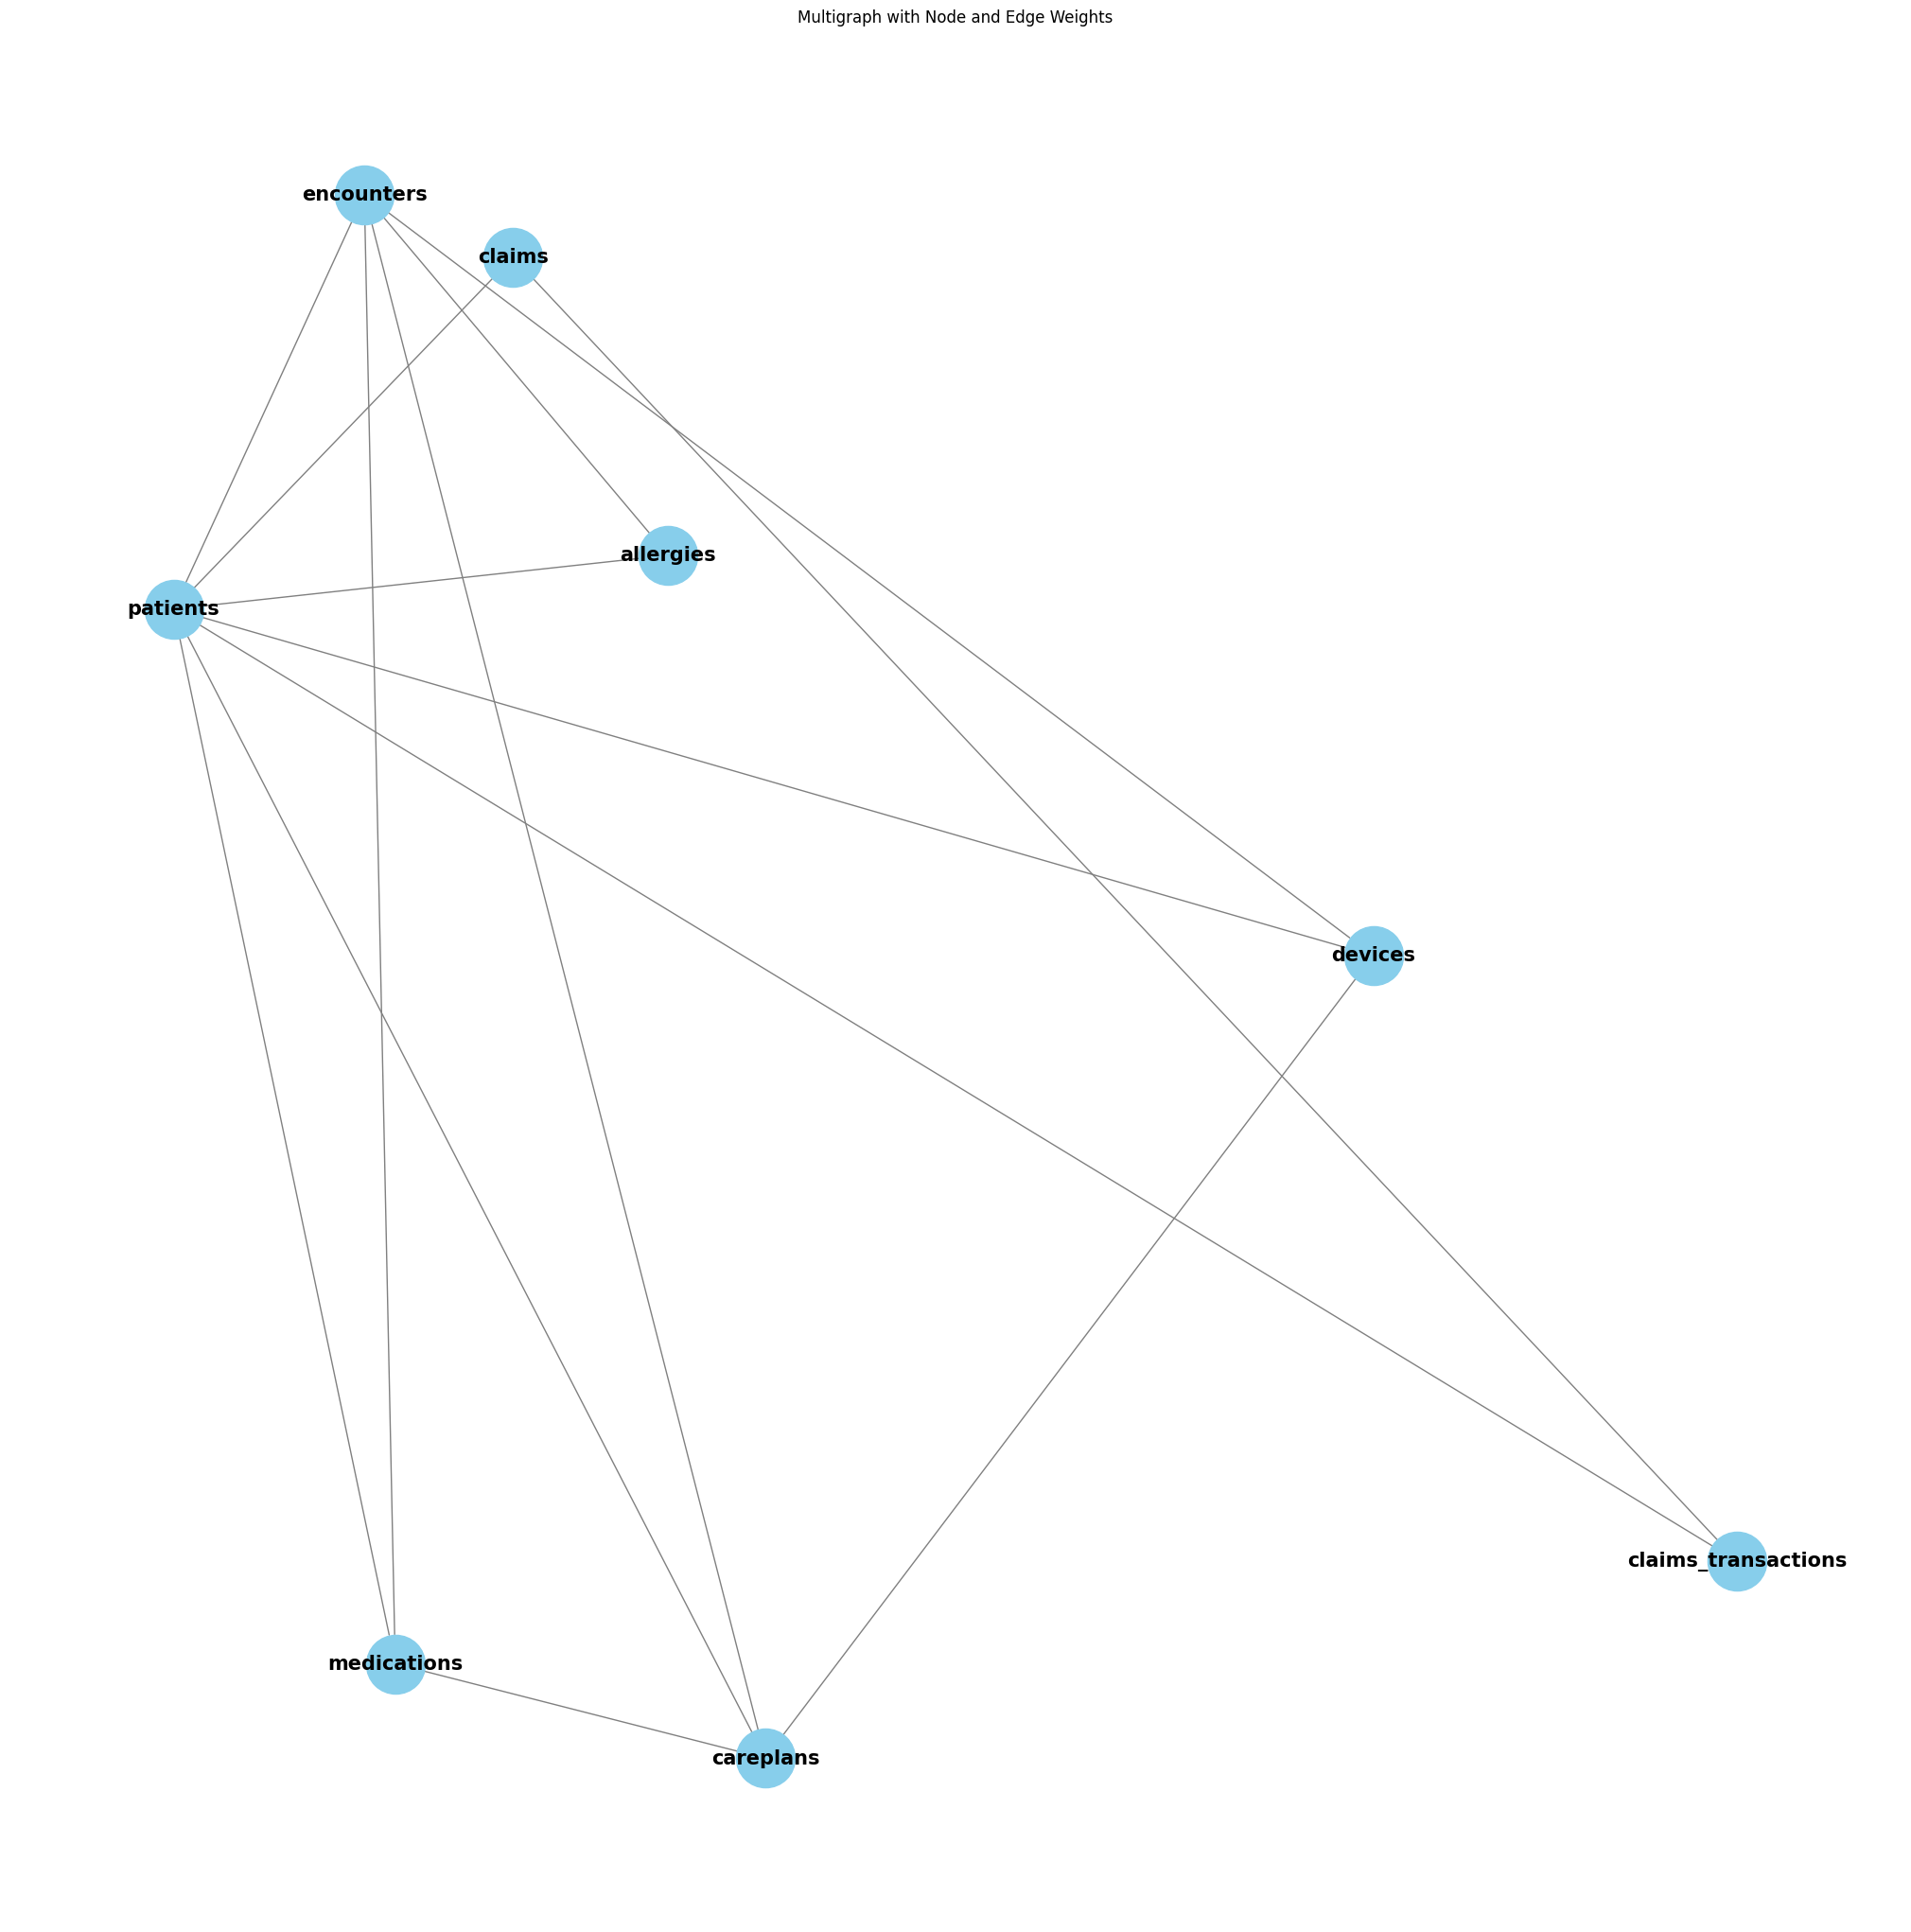

In [0]:
sm.visualize()  # To visualize the relationships as a graph


## 4. The Semantic Layer

The SemanticModel results are used to generate YAML files which are saved automatically. These files defines the semantic layer, including the models (tables) and their relationships. 

By default, these files are saved in the current working directory. You can configure this path by setting the `PROJECT_BASE` environment variable.

## Syncing with Databricks Unity Catalog


Fill in the variables required in the code snippet below:

In [0]:
import os

from pyspark.sql import SparkSession
from pyspark.sql.types import (
    BooleanType,
    DateType,
    DoubleType,
    LongType,
    StringType,
    StructField,
    StructType,
    TimestampType,
)

# Assuming the intugle library is installed in the Databricks environment
# If not, you would need to install it, e.g., with %pip install intugle
from intugle.parser.manifest import ManifestLoader

# --- Configuration ---
# Please update these values to match your Databricks environment

# The name of the Unity Catalog to use
CATALOG_NAME = "intugle"

# The name of the schema (database) within the catalog to create tables in
SCHEMA_NAME = "default"

# The absolute path to your Intugle project's root directory within Databricks.
# This is where your .yml files are located.
# Example: "/Workspace/Users/your.email@domain.com/data-tools/"
INTUGLE_PROJECT_ROOT = "/Workspace/Users/raphael.tony@intugle.ai/models/"

# The base path for your raw data files (CSVs) within Databricks Volumes.
# The script will combine this path with the relative paths from your YAML files.
# Example: "/Volumes/main/default/raw_data/"
VOLUME_MOUNT_PATH = "/Volumes/intugle/default/sample_datasets/"

# --- End of Configuration ---

Run the snippet below to sync with the Unity catalog

In [0]:
import os

import sqlglot

# Assuming the intugle library is installed in the Databricks environment
# If not, you would need to install it, e.g., with %pip install intugle


def load_intugle_manifest(project_path: str):
    """
    Loads the complete Intugle manifest from the specified project directory.

    Args:
        project_path: The root path of the Intugle project containing .yml files.

    Returns:
        An instance of the Manifest object populated with all metadata.
    """
    print(f"Loading Intugle manifest from: {project_path}")
    if not os.path.isdir(project_path):
        raise FileNotFoundError(
            f"The specified Intugle project path does not exist: {project_path}"
        )
    manifest_loader = ManifestLoader(project_path)
    manifest_loader.load()
    print("Manifest loaded successfully.")
    return manifest_loader.manifest


def map_intugle_to_spark_type(intugle_type: str) -> str:
    """
    Maps data types from Intugle's analysis to Spark SQL data types for DDL.

    Args:
        intugle_type: The data type string from Intugle (e.g., 'string', 'integer').

    Returns:
        The corresponding Spark SQL data type string.
    """
    type_mapping = {
        "string": "STRING",
        "integer": "BIGINT",
        "float": "DOUBLE",
        "date & time": "TIMESTAMP",
        "date": "DATE",
        "boolean": "BOOLEAN",
    }
    # Default to STRING if the type is not found in the mapping
    return type_mapping.get(intugle_type, "STRING")


def get_spark_schema(columns) -> StructType:
    """
    Converts a list of Intugle columns from the manifest to a PySpark StructType
    to be used when reading CSVs.

    Args:
        columns: A list of Column objects from the Intugle manifest.

    Returns:
        A PySpark StructType defining the schema.
    """

    def get_spark_type_object(intugle_type: str):
        """Maps Intugle type string to a Spark DataType object."""
        type_mapping = {
            "string": StringType(),
            "integer": LongType(),
            "float": DoubleType(),
            "date & time": TimestampType(),
            "date": DateType(),
            "boolean": BooleanType(),
        }
        # Default to StringType for unknown or unspecified types
        return type_mapping.get(intugle_type, StringType())

    fields = []
    for col in columns:
        spark_type = get_spark_type_object(col.type)
        # Assume all columns are nullable when reading from a raw CSV
        fields.append(StructField(col.name, spark_type, True))

    return StructType(fields)


def create_and_populate_tables(
    spark: SparkSession, manifest, catalog: str, schema: str, volume_base_path: str
):
    """
    Generates and executes SQL to create tables in Unity Catalog and populates them
    with data from the source CSV files.

    Args:
        spark: The active SparkSession.
        manifest: The loaded Intugle Manifest object.
        catalog: The name of the Unity Catalog.
        schema: The name of the schema to create tables in.
        volume_base_path: The base path where raw CSV files are located.
    """
    print(f"Starting table creation in catalog '{catalog}', schema '{schema}'...")

    # Ensure the catalog and schema exist
    spark.sql(f"USE CATALOG {catalog}")
    spark.sql(f"CREATE SCHEMA IF NOT EXISTS {schema}")

    for source in manifest.sources.values():
        table = source.table
        table_name = table.name
        full_table_name = f"{catalog}.{schema}.{table_name}"
        print(f"\nProcessing table: {full_table_name}")

        # --- 1. Generate CREATE TABLE Statement ---
        column_definitions = []
        for col in table.columns:
            spark_type = map_intugle_to_spark_type(col.type)

            # Add NOT NULL constraint if the column is a primary key
            not_null_constraint = " NOT NULL" if col.name == table.key else ""

            # Add comments for column descriptions
            comment = (
                f" COMMENT '{col.description.replace("'", "\\'")}'"
                if col.description
                else ""
            )
            column_definitions.append(
                f"  `{col.name}` {spark_type}{not_null_constraint}{comment}"
            )

        table_comment = (
            f"COMMENT '{table.description.replace("'", "\\'")}'"
            if table.description
            else ""
        )

        create_table_ddl = f"""
        CREATE TABLE IF NOT EXISTS {full_table_name} (
        {',\n'.join(column_definitions)}
        )
        {table_comment}
        """

        print("Executing CREATE TABLE statement...")
        spark.sql(create_table_ddl)
        print(f"Table {full_table_name} created or already exists.")

        # --- 2. Load Data from CSV and Populate Table ---
        try:
            relative_path = table.details.get("path")
            if not relative_path:
                print(f"WARNING: No file path found for table '{table_name}'. Skipping data load.")
                continue

            csv_path = os.path.join(volume_base_path, relative_path)
            print(f"Reading data from: {csv_path}")

            if not os.path.exists(csv_path):
                # Fallback for different volume mount structures
                if volume_base_path.startswith('/Volumes'):
                    csv_path_alt = '/dbfs' + csv_path
                    if os.path.exists(csv_path_alt):
                        csv_path = csv_path_alt
                    else:
                        print(f"ERROR: CSV file not found at '{csv_path}' or '{csv_path_alt}'. Skipping data load.")
                        continue
                else:
                    print(f"ERROR: CSV file not found at '{csv_path}'. Skipping data load.")
                    continue

            # --- 2a. Define Explicit Schema for CSV Reading ---
            spark_schema = get_spark_schema(table.columns)
            print("Generated Spark schema for CSV reading.")

            df = spark.read.csv(csv_path, header=True, schema=spark_schema)

            print(f"Writing data to {full_table_name}...")
            # Use overwrite mode to ensure idempotency
            df.write.mode("overwrite").saveAsTable(full_table_name)
            print(f"Successfully populated table {full_table_name}.")

        except Exception as e:
            print(f"ERROR: Failed to load data for table {table_name}. Reason: {e}")


def apply_tags(spark: SparkSession, manifest, catalog: str, schema: str):
    """
    Applies tags to tables and columns in Unity Catalog based on the manifest.

    Args:
        spark: The active SparkSession.
        manifest: The loaded Intugle Manifest object.
        catalog: The name of the Unity Catalog.
        schema: The name of the schema where tables exist.
    """
    print("\nApplying tags to tables and columns...")
    spark.sql(f"USE CATALOG {catalog}")
    spark.sql(f"USE SCHEMA {schema}")

    for source in manifest.sources.values():
        table = source.table
        full_table_name = f"{catalog}.{schema}.{table.name}"

        # --- 1. Apply Table Tags ---
        if table.tags:
            try:
                # Format tags for SQL: ('key1' = 'true', 'key2' = 'true')
                tag_str = ", ".join([f"'{tag}'" for tag in table.tags])
                ddl = f"ALTER TABLE {full_table_name} SET TAGS ({tag_str})"
                print(f"Applying tags to table {full_table_name}")
                spark.sql(ddl)
            except Exception as e:
                print(f"WARNING: Could not apply tags to table {full_table_name}. Reason: {e}")

        # --- 2. Apply Column Tags ---
        for col in table.columns:
            if col.tags:
                try:
                    tag_str = ", ".join([f"'{tag}'" for tag in col.tags])
                    ddl = f"ALTER TABLE {full_table_name} ALTER COLUMN `{col.name}` SET TAGS ({tag_str})"
                    print(f"Applying tags to column {full_table_name}.`{col.name}`")
                    spark.sql(ddl)
                except Exception as e:
                    print(
                        f"WARNING: Could not apply tags to column {full_table_name}.`{col.name}`. Reason: {e}"
                    )


def main():
    """
    Main execution function to set up the Unity Catalog tables.
    """
    # In a Databricks notebook, SparkSession is automatically available as `spark`
    spark = SparkSession.builder.appName("IntugleUnityCatalogSetup").getOrCreate()

    try:
        # 1. Load metadata from Intugle's YAML files
        manifest = load_intugle_manifest(INTUGLE_PROJECT_ROOT)

        # 2. Create tables and populate them with data
        create_and_populate_tables(
            spark, manifest, CATALOG_NAME, SCHEMA_NAME, VOLUME_MOUNT_PATH
        )

        # 3. Apply tags to tables and columns
        apply_tags(spark, manifest, CATALOG_NAME, SCHEMA_NAME)

        print("\n-------------------------------------------------")
        print("Unity Catalog setup process completed successfully!")
        print("-------------------------------------------------")

    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()

Loading Intugle manifest from: /Workspace/Users/raphael.tony@intugle.ai/models/
Manifest loaded successfully.
Starting table creation in catalog 'intugle', schema 'default'...

Processing table: intugle.default.encounters
Executing CREATE TABLE statement...
Table intugle.default.encounters created or already exists.
Reading data from: /Volumes/intugle/default/sample_datasets/encounters.csv
Generated Spark schema for CSV reading.
Writing data to intugle.default.encounters...
Successfully populated table intugle.default.encounters.

Processing table: intugle.default.claims
Executing CREATE TABLE statement...
Table intugle.default.claims created or already exists.
Reading data from: /Volumes/intugle/default/sample_datasets/claims.csv
Generated Spark schema for CSV reading.
Writing data to intugle.default.claims...
Successfully populated table intugle.default.claims.

Processing table: intugle.default.medications
Executing CREATE TABLE statement...
Table intugle.default.medications created

## 6. Data Product Creation

The semantic layer serves as a foundation for the DataProduct, which streamlines the creation of reusable data products. This allows you
to encapsulate business logic and create standardized, trustworthy data assets that can be easily shared and reused across different teams and 
applications.

Let's define the model for the data product we want to build:

#### EXAMPLE 1 : Top Patients by Claim Count

In [0]:
data_product_config = {
  "name": "top_patients_by_claim_count",
  "fields": [
    {
      "id": "patients.first",
      "name": "first_name",
    },
    {
      "id": "patients.last",
      "name": "last_name",
    },
    {
      "id": "claims.id",
      "name": "number_of_claims",
      "category": "measure",
      "measure_func": "count"
    }
  ],
  "filter": {
    "sort_by": [
      {
        "id": "claims.id",
        "alias": "number_of_claims",
        "direction": "desc"
      }
    ],
    "limit": 10
  }
}

Now, let's use the `DataProduct` to generate the data product:

In [0]:
from intugle import DataProduct

# Create a DataProduct
dp = DataProduct()

# Generate the data product
data_product = dp.build(data_product_config)

data_product.to_df()

Found existing YAML for 'encounters'. Checking for staleness.
encounters loaded
Found existing YAML for 'claims'. Checking for staleness.
claims loaded
Found existing YAML for 'medications'. Checking for staleness.
medications loaded
Found existing YAML for 'allergies'. Checking for staleness.
allergies loaded
Found existing YAML for 'careplans'. Checking for staleness.
careplans loaded
Found existing YAML for 'claims_transactions'. Checking for staleness.
claims_transactions loaded
Found existing YAML for 'devices'. Checking for staleness.
devices loaded
Found existing YAML for 'patients'. Checking for staleness.
patients loaded
top_patients_by_claim_count
top_patients_by_claim_count loaded


,first_name,last_name,number_of_claims
0,Esther279,Runolfsson901,246
1,Zelda766,Ernser583,219
2,Bonita405,Bernier607,121
3,Pei116,Williamson769,98
4,Lavinia262,Heaney114,90
5,Magdalene960,Orn563,90
6,Tommye961,Simonis280,77
7,Franklyn361,Tromp100,71
8,Terry864,King743,69
9,Alaine226,Willms744,64


The `generate_product` function returns a `DataSet` object. You can also view the generated SQL query used for creating the data product:


In [0]:
# The generated SQL query
data_product.sql_query



'SELECT "patients"."first" as first_name, "patients"."last" as last_name, count("claims"."id") as number_of_claims FROM claims LEFT JOIN patients ON "claims"."patientid" = "patients"."id" GROUP BY "patients"."first" , "patients"."last" ORDER BY number_of_claims DESC LIMIT 10'

### Generating glossary for the Data Product

The `data_product` is in itself a DataSet object. Hence we can run generate glossaries for it as well. 

In [0]:

data_product.run(domain="Healthcare")

/databricks/python/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/databricks/python/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/databricks/python/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/databricks/python/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use 

  0%|          | 0/3 [00:00<?, ?it/s]

[*] top_patients_by_claim_count:   0%|          | 0/1 [00:00<?, ?it/s]/local_disk0/.ephemeral_nfs/envs/pythonEnv-be50f3e0-0e39-4b76-80e9-7a5806855f79/lib/python3.12/site-packages/intugle/core/pipeline/key_identification/ki.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns={"datatype_l1": "datatype"}, inplace=True)
[*] top_patients_by_claim_count: 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


  0%|          | 0/3 [00:00<?, ?it/s]

,column_name,table_name,business_name,datatype_l1,datatype_l2,business_glossary,business_tags,count,null_count,distinct_count,uniqueness,completeness,sample_data
0,first_name,top_patients_by_claim_count,first_name,alphanumeric,L2OutputTypes.dimension,Identifies the given name of individuals liste...,"[Patient Identification, Healthcare Claims Ana...",10,0,10,1.0,1.0,"[Franklyn361, Terry864, Bonita405, Esther279, ..."
1,last_name,top_patients_by_claim_count,last_name,alphanumeric,L2OutputTypes.dimension,Identifies the family name associated with ind...,"[Patient Identification, Claims Analysis, Heal...",10,0,10,1.0,1.0,"[Simonis280, Orn563, Williamson769, Ernser583,..."
2,number_of_claims,top_patients_by_claim_count,number_of_claims,integer,L2OutputTypes.measure,Indicates the total count of claims associated...,"[Claims Volume, Patient Activity, Healthcare U...",10,0,9,0.9,1.0,"[77, 69, 71, 219, 90, 98, 246, 121, 64]"


## Syncing the data product with Unity Catalog

A data product can be passed in the `create_dp_table_in_databricks` function along with the target catalog and schema to store it in the Unity Catalog

In [0]:
from intugle.analysis.models import DataSet


def create_dp_table_in_databricks(
    data_product: DataSet, catalog_name: str, schema_name: str, table_name: str
):
    """
    Executes a data product's SQL query on Databricks and saves the result
    as a table in Unity Catalog, including all metadata.

    NOTE: Requires the sqlglot library to be installed in the environment.
          (e.g., with %pip install sqlglot)

    Args:
        data_product: The Intugle DataSet object representing the data product.
        catalog_name: The destination Unity Catalog name.
        schema_name: The destination schema name.
        table_name: The name for the new table to be created.
    """
    spark = SparkSession.builder.appName(
        f"CreateDataProduct_{table_name}"
    ).getOrCreate()
    full_table_name = f"{catalog_name}.{schema_name}.{table_name}"
    print(f"Attempting to create data product table: {full_table_name}")

    # 1. Extract and Translate SQL Query
    duckdb_query = data_product.sql_query
    if not duckdb_query:
        print(f"ERROR: Data product '{data_product.name}' does not contain a SQL query.")
        return

    # Translate from DuckDB dialect to Databricks (Spark) dialect using sqlglot
    try:
        spark_sql_query = sqlglot.transpile(
            duckdb_query, read="duckdb", write="databricks", pretty=True
        )[0]
        print("Successfully translated SQL query for Databricks:")
        print(spark_sql_query)
    except Exception as e:
        print(f"ERROR: Failed to transpile SQL query using sqlglot. Reason: {e}")
        print("Falling back to simple quote replacement.")
        spark_sql_query = duckdb_query.replace('"', "`")

    try:
        # 2. Execute the Query
        print("Executing Spark SQL query...")
        result_df = spark.sql(spark_sql_query)

        # 3. Persist the Result as a Table
        print(f"Saving results to table: {full_table_name}")
        result_df.write.mode("overwrite").saveAsTable(full_table_name)
        print("Table created successfully.")

        # 4. Apply Table and Column Metadata (Comments and Tags)
        # Add table comment
        if data_product.source_table_model.description:
            table_comment = data_product.source_table_model.description.replace("'", "\\'")
            spark.sql(f"COMMENT ON TABLE {full_table_name} IS '{table_comment}'")
            print("Applied table comment.")

        # Add table tags
        if data_product.source_table_model.tags:
            table_tags = ", ".join([f"'{tag}'" for tag in data_product.source_table_model.tags])
            spark.sql(f"ALTER TABLE {full_table_name} SET TAGS ({table_tags})")
            print("Applied table tags.")

        # Add column comments and tags
        for col in data_product.source_table_model.columns:
            if col.description:
                col_comment = col.description.replace("'", "\\'")
                spark.sql(
                    f"ALTER TABLE {full_table_name} ALTER COLUMN `{col.name}` COMMENT '{col_comment}'"
                )
            if col.tags:
                col_tags = ", ".join([f"'{tag}'" for tag in col.tags])
                spark.sql(
                    f"ALTER TABLE {full_table_name} ALTER COLUMN `{col.name}` SET TAGS ({col_tags})"
                )
        print("Applied all column comments and tags.")
        print(f"\nData product '{table_name}' successfully created in Unity Catalog.")

    except Exception as e:
        print(f"ERROR: Failed to create data product table '{full_table_name}'. Reason: {e}")
        import traceback
        traceback.print_exc()

Now you can call the `create_dp_table_in_databricks` to create the data product in the unity catalog. 

In [0]:
# Define where to save it in Unity Catalog
catalog = "intugle"
schema = "data_products"
   
# 3. Call the new function to create it in Databricks
create_dp_table_in_databricks(data_product, catalog, schema, "top_patients_by_claim_count")

Attempting to create data product table: intugle.data_products.top_patients_by_claim_count
Successfully translated SQL query for Databricks:
SELECT
  `patients`.`first` AS first_name,
  `patients`.`last` AS last_name,
  COUNT(`claims`.`id`) AS number_of_claims
FROM claims
LEFT JOIN patients
  ON `claims`.`patientid` = `patients`.`id`
GROUP BY
  `patients`.`first`,
  `patients`.`last`
ORDER BY
  number_of_claims DESC
LIMIT 10
Executing Spark SQL query...
Saving results to table: intugle.data_products.top_patients_by_claim_count
Table created successfully.
Applied table comment.
Applied all column comments and tags.

Data product 'top_patients_by_claim_count' successfully created in Unity Catalog.


## Conclusion

You've learned how to:

*   Configure your LLM provider.
*   Build a semantic model
*   Sync your tables with Unity Catalog.
*   Generate data products from the semantic layer
*   Sync the data products with Unity Catalog

This is just a starting point. This project has many other features to explore. We encourage you to try it with your own data and see how it can help you build a powerful semantic layer.